In [1]:
# Dataset: Salary_Data.csv
# Location: https://mitu.co.in/dataset

#### Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read the dataset

In [3]:
df = pd.read_csv('Salary_Data.csv')

In [4]:
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


#### Separate the input and output variables

In [5]:
x = df[['YearsExperience']]
y = df['Salary']

#### Explore the data

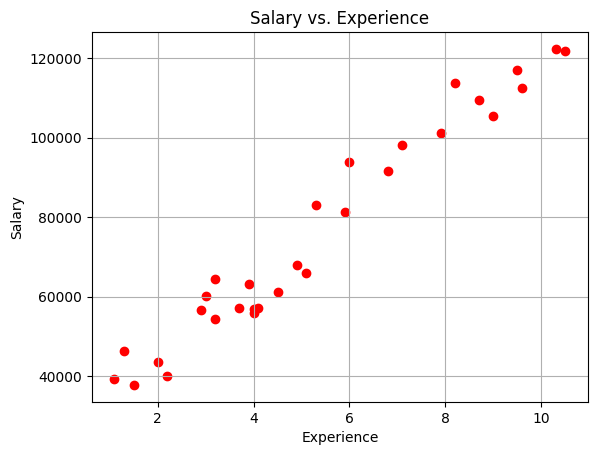

In [6]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color='r')

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


#### Cross Validation

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [10]:
x_train.shape

(22, 1)

In [11]:
x_test.shape

(8, 1)

In [12]:
x_train

,YearsExperience
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8
1,1.3
29,10.5


#### Build the machine learning model

In [14]:
# import class
from sklearn.linear_model import LinearRegression

In [15]:
# create object
regressor = LinearRegression()

In [16]:
# train the algorithm
regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
# slope
regressor.coef_

array([9379.71049195])

In [18]:
# y-intercept
regressor.intercept_

26986.691316737248

#### Predict on unseen data

In [20]:
regressor.predict([[12]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([139543.21722009])

#### Performance Evaluation

In [22]:
# Predict on the test dataset
y_pred = regressor.predict(x_test)

In [23]:
# Compare
result = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [24]:
result

,Actual,Predicted
2,37731,41056.257055
28,122391,123597.709384
13,57081,65443.504334
10,63218,63567.562235
26,116969,116093.940990
24,109431,108590.172597
27,112635,117031.912039
11,55794,64505.533285


In [26]:
import numpy as np

In [27]:
# mean absolute error
np.mean(abs(y_test - y_pred))

3508.5455930660555

In [28]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.05754512646779697

In [30]:
# accuracy of linearity / r-squared error
regressor.score(x_train, y_train)

0.9395413526983522

In [31]:
regressor.score(x_test, y_test)

0.9779208335417602

In [32]:
# Predict the result using model
y_pred = regressor.predict(x)

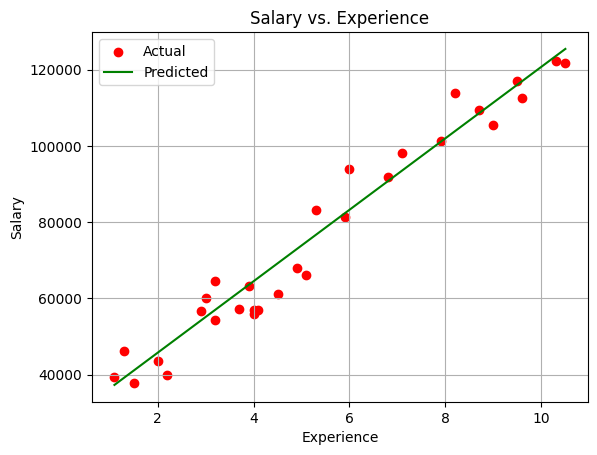

In [33]:
plt.title('Salary vs. Experience')
plt.grid()
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.scatter(x, y, color='r', label = 'Actual')
plt.plot(x, y_pred, color='g', label='Predicted')
plt.legend()

In [34]:
regressor.predict([[15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167682.34869593])

In [ ]:
15 * regressor.coef_[0] + regressor.intercept_